In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demand-forecasting-kernels-only/train.csv
/kaggle/input/demand-forecasting-kernels-only/test.csv
/kaggle/input/demand-forecasting-kernels-only/sample_submission.csv


In [2]:
!pip3 install fbprophet --user



You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
!pip3 install holidays==0.9.12



     |████████████████████████████████| 85 kB 531 kB/s eta 0:00:011
  Created wheel for holidays: filename=holidays-0.9.12-py3-none-any.whl size=47610 sha256=49c67cf763de03dc6cfd2694eb13324670de3911387847def4915898ce03f9ec
  Stored in directory: /root/.cache/pip/wheels/d6/97/f5/f1f13a6a04d5505bdd19c6769841595ad6f6f2095ffd7c37a2
Successfully built holidays
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.3
    Uninstalling holidays-0.10.3:
      Successfully uninstalled holidays-0.10.3
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
import time
import matplotlib
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np

from fbprophet import Prophet


In [6]:
df_raw = pd.read_csv('/kaggle/input/demand-forecasting-kernels-only/train.csv', 
                     low_memory=False, 
                     parse_dates=['date'], 
                     index_col=['date'])

In [7]:
df_raw

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [8]:
df_raw = df_raw.sort_values('date', ascending=True)

In [9]:
df_raw

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-01,7,12,26
2013-01-01,7,46,27
2013-01-01,8,12,54
2013-01-01,9,12,35
...,...,...,...
2017-12-31,9,34,21
2017-12-31,10,34,32
2017-12-31,1,35,55


In [10]:
df_raw.shape

(913000, 3)

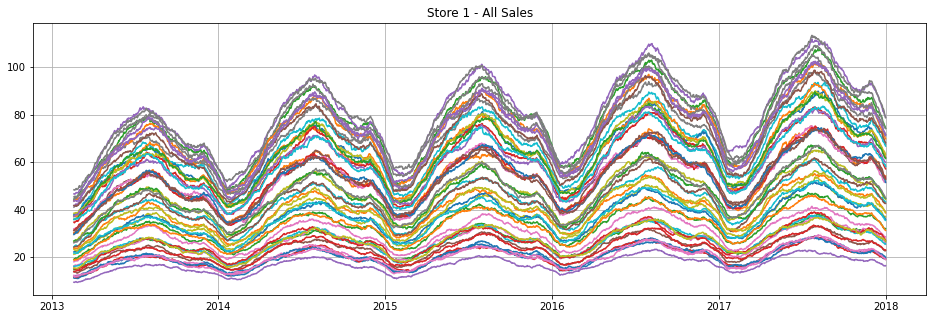

In [16]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Store 1 - All Sales')
for item in set(df_raw[df_raw['store'] == 1]['item']):
    plt.plot(df_raw[(df_raw['store'] == 1) & 
                    (df_raw['item'] == item)]['sales'].rolling(window=50).mean())


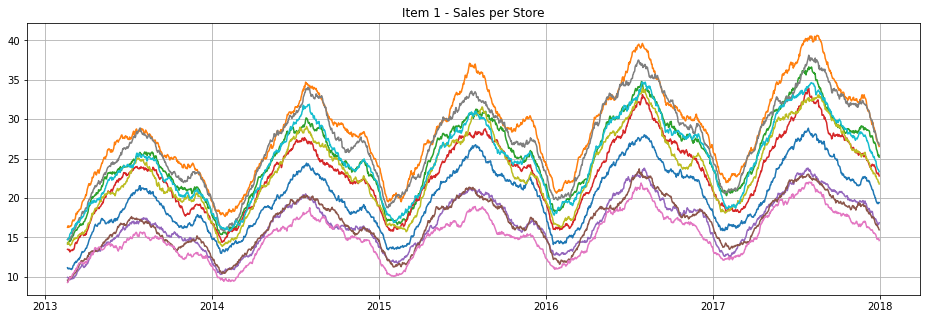

In [17]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Item 1 - Sales per Store')
for store in set(df_raw[df_raw['item'] == 1]['store']):
    plt.plot(df_raw[(df_raw['item'] == 1) & 
                    (df_raw['store'] == store)]['sales']
             .rolling(window=50).mean())

In [18]:
# preparing the data into FBP format:
train_dataset = df_raw[(df_raw['item'] == 1) & df_raw['store'] == 1] 
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['date', 'sales']]
train_dataset.columns = ["ds", "y"]

In [19]:
train_dataset

,ds,y
0,2013-01-01,13
1,2013-01-01,11
2,2013-01-01,7
3,2013-01-01,11
4,2013-01-01,19
...,...,...
9125,2017-12-31,23
9126,2017-12-31,19
9127,2017-12-31,24
9128,2017-12-31,16


In [21]:
train_dataset = train_dataset.sample(5000)
train_dataset

,ds,y
3231,2014-10-09,18
3268,2014-10-16,17
6554,2016-08-03,19
7949,2017-05-09,32
7376,2017-01-15,29
...,...,...
574,2013-04-25,15
230,2013-02-16,15
8633,2017-09-23,32
7757,2017-04-01,22


In [22]:
prophet_basic = Prophet()

In [23]:
prophet_basic.fit(train_dataset)

In [24]:
future= prophet_basic.make_future_dataframe(periods=365)

In [25]:
future

,ds
0,2013-01-01
1,2013-01-01
2,2013-01-01
3,2013-01-02
4,2013-01-02
...,...
5360,2018-12-26
5361,2018-12-27
5362,2018-12-28
5363,2018-12-29


In [26]:
forecast=prophet_basic.predict(future)

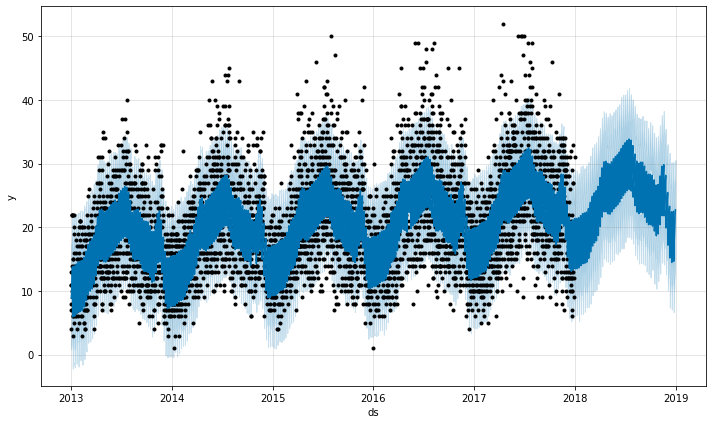

In [27]:
#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

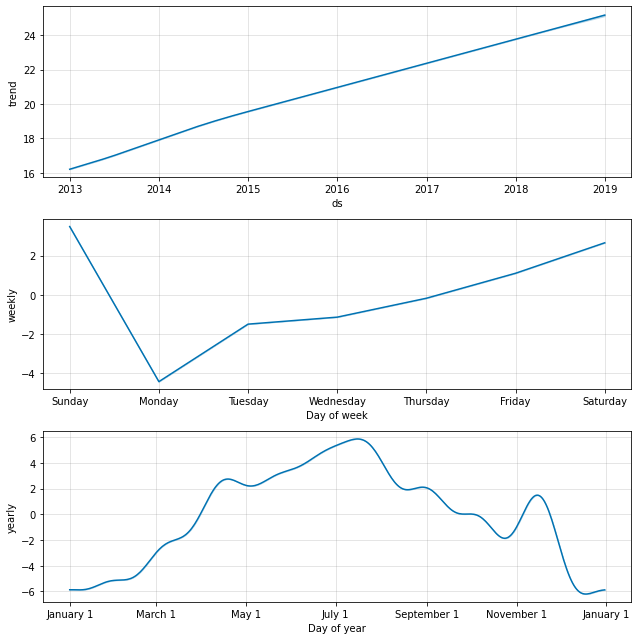

In [30]:
fig1 = prophet_basic.plot_components(forecast)

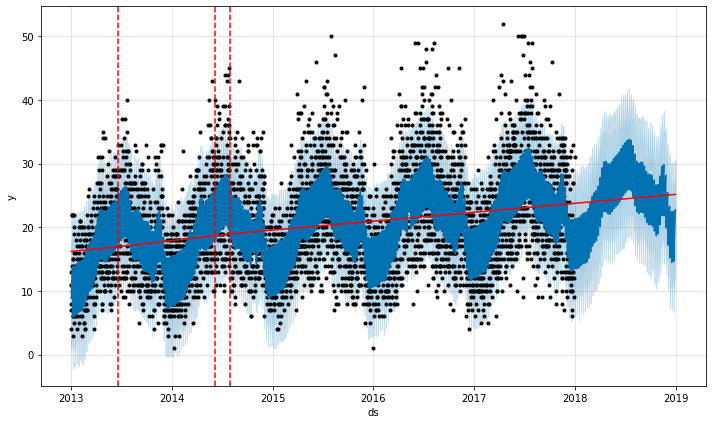

In [31]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)